In [60]:
import pandas as pd

#s0: 50Mbps, 20ms
#s1:
# rate0 = [2,4,6,8,10]
# rate1 = [40,42,44,46,48,50]
schedulerTypes = [0,1,2,3,5]
# skip = [97, 188]

comTime = []
# get complete time

for j in range(1,101):
    # if(j in skip):
    #     continue
    c_time = []
    for i in schedulerTypes:
        dir = 'dynamic2-'+str(j)
        file = open(dir+'/scheduler'+str(i)+'-queue.txt', 'r')
        last_line = file.readlines()[-1]
        # print(j)
        if (int(last_line.split('\t')[3]) > 5000000):
            c_time.append(float(last_line.split('\t')[0]))
        else:
            c_time.append(0)
    # c_time.append(r0)
    # c_time.append(r1)
    # if(d == ""):
    #     c_time.append("0") 
    # else:
    #     c_time.append(d)
    comTime.append(c_time)

dataTotal = pd.DataFrame (comTime, columns = ['RR', 'MRTT', 'BLEST', 'ECF', 'MAB'])
print(dataTotal)


          RR      MRTT     BLEST       ECF       MAB
0   10.12740   8.42245   8.03844   8.57274   6.17485
1    9.77330   7.37760   8.65434   8.71435   9.84291
2   10.51540   9.63990   9.63990  10.45330   7.93445
3    7.51699   7.14385   8.76950   6.28895   6.10820
4   10.82920   8.41213   0.00000  10.12230  10.18100
..       ...       ...       ...       ...       ...
95  10.77800  10.82660  10.82660   9.72014   7.92307
96   6.42730   8.90474   0.00000   9.21061   6.99507
97   8.86562   8.63083   0.00000   9.28400   8.76751
98  10.50490   9.62630   0.00000  12.08760  11.42040
99   9.61008   7.19226   7.60764   7.01710   9.07089

[100 rows x 5 columns]


In [61]:
toDrop = dataTotal.loc[dataTotal["BLEST"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop = dataTotal.loc[dataTotal["RR"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["MRTT"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["ECF"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["MAB"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)


In [65]:
## high dynamic

toDrop = dataTotal.loc[dataTotal["BLEST"] > 14.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop = dataTotal.loc[dataTotal["RR"] > 14.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["MRTT"] > 14.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["ECF"] > 14.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["MAB"] > 10.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)

In [68]:
# toDrop =dataTotal.loc[dataTotal["MAB"] > 9.5].index.tolist()
# dataTotal = dataTotal.drop(toDrop)
# toDrop = dataTotal.loc[dataTotal["MRTT"] < 6.0].index.tolist()
# dataTotal = dataTotal.drop(toDrop)
# toDrop = dataTotal.loc[dataTotal["MRTT"] < 9.0].index.tolist()
# dataTotal = dataTotal.drop(toDrop)
# toDrop = dataTotal.loc[dataTotal["BLEST"] > 14.0].index.tolist()
# dataTotal = dataTotal.drop(toDrop)
toDrop = dataTotal.loc[dataTotal["RR"] < 6.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
# toDrop =dataTotal.loc[dataTotal["ECF"] > 14.0].index.tolist()
# dataTotal = dataTotal.drop(toDrop)
# toDrop =dataTotal.loc[dataTotal["MAB"] < 6].index.tolist()
# dataTotal = dataTotal.drop(toDrop)

dataTotal.count()


RR       61
MRTT     61
BLEST    61
ECF      61
MAB      61
dtype: int64

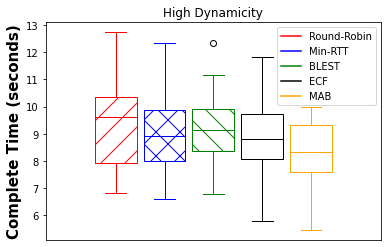

In [72]:
import matplotlib.pyplot as plt
import numpy as np

ct0 = [dataTotal['RR']]
ct1 = [dataTotal['MRTT']]
ct2 = [dataTotal['BLEST']]
ct3 = [dataTotal['ECF']]
ct4 = [dataTotal['MAB']]

# ticks = ['dynamic2']
bar_width = 0.3
# create a boxplot for two arrays separately,
# the position specifies the location of the
# particular box in the graph,
# this can be changed as per your wish. Use width
# to specify the width of the plot
# plt.figure(figsize=(10,6))
ct_plot0 = plt.boxplot(ct0,positions=np.array(np.arange(len(ct0))),widths=bar_width, patch_artist=True)
for box in ct_plot0['boxes']:
    box.set(hatch = '/', fill=False) 
ct_plot1 = plt.boxplot(ct1,positions=np.array(np.arange(len(ct1)))+bar_width+0.05,widths=bar_width, patch_artist=True)
for box in ct_plot1['boxes']:
    box.set(hatch = 'x', fill=False) 
ct_plot2 = plt.boxplot(ct2,positions=np.array(np.arange(len(ct2)))+bar_width*2+0.05*2,widths=bar_width, patch_artist=True)
for box in ct_plot2['boxes']:
    box.set(hatch = '\\', fill=False) 
ct_plot3 = plt.boxplot(ct3,positions=np.array(np.arange(len(ct3)))+bar_width*3+0.05*3,widths=bar_width, patch_artist=True)
for box in ct_plot3['boxes']:
    box.set(hatch = '', fill=False)
ct_plot4 = plt.boxplot(ct4,positions=np.array(np.arange(len(ct4)))+bar_width*4+0.05*4,widths=bar_width, patch_artist=True)
for box in ct_plot4['boxes']:
    box.set(hatch = '', fill=False) 

def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
 
 
# setting colors for each groups
define_box_properties(ct_plot0, 'red', 'Round-Robin')
define_box_properties(ct_plot1, 'blue', 'Min-RTT')
define_box_properties(ct_plot2, 'green', 'BLEST')
define_box_properties(ct_plot3, 'black', 'ECF')
define_box_properties(ct_plot4, 'orange', 'MAB')
 
# set the x label values
# plt.xticks(np.arange(0, len(ticks))+2.5*bar_width, ticks)
plt.tick_params(labelbottom = False, bottom = False)
plt.ylabel("Complete Time (seconds)", fontsize=15, fontweight='bold')
# plt.xlabel("LTE-Wifi Delay (ms)", fontsize=15, fontweight='bold')
# set the limit for x axis
# plt.xlim(-2, len(ticks)*2)
 
# set the limit for y axis
# plt.ylim(0, 50)
 
# set the title
plt.title('High Dynamicity')
# plt.savefig('./comTime_high.png', format='png')
plt.show()

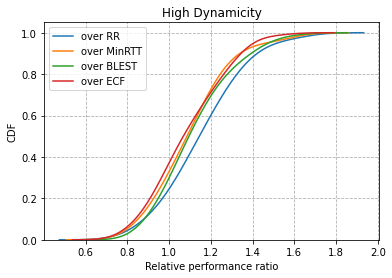

In [71]:

import seaborn as sns

# plt.figure(figsize=(10,6))
plt.title('High Dynamicity')
sns.kdeplot(data = dataTotal['RR']/dataTotal['MAB'], cumulative = True, label = "over RR")
sns.kdeplot(data = dataTotal['MRTT']/dataTotal['MAB'], cumulative = True, label = "over MinRTT")
sns.kdeplot(data = dataTotal['BLEST']/dataTotal['MAB'], cumulative = True, label = "over BLEST")
sns.kdeplot(data = dataTotal['ECF']/dataTotal['MAB'], cumulative = True, label = "over ECF")
plt.legend()
plt.grid(linestyle="--") 
# plt.xlim(0.5,2.1)
plt.xlabel("Relative performance ratio")
plt.ylabel("CDF")
# plt.savefig('./cdf_high.png', format='png')
plt.show()
  